In [ ]:
#Incluya las principales librerias a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

# Carga de Datos

##### Lee el archivo Excel

In [ ]:
excel_file = pd.read_excel('/content/drive/MyDrive/Septimo Ciclo/Machine Learning/TP_TF/TP/AdquisicioÃÅn y Pre Procesamientos de los Datos./Centrifuge - 2025-05-03 - 2022-01-23.xlsx')

##### Guadar como csc

In [ ]:
excel_file.to_csv('Centrifuge.csv', index=False)

##### Leer el archivo en csv

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Septimo Ciclo/Machine Learning/TP_TF/TP/AdquisicioÃÅn y Pre Procesamientos de los Datos./Centrifuge.csv')

# Analisis y exploracion de datos

| **Columna** | **Tipo de Dato** | **Descripci√≥n / Significado**                                                                                      |
| ----------- | ---------------- | ------------------------------------------------------------------------------------------------------------------ |
| `timeOpen`  | `object` (str)   | Fecha y hora en que se abri√≥ el per√≠odo de trading (por lo general, el inicio del d√≠a).                            |
| `timeClose` | `object` (str)   | Fecha y hora en que se cerr√≥ el per√≠odo de trading (por lo general, el final del d√≠a).                             |
| `timeHigh`  | `object` (str)   | Momento exacto en que el precio alcanz√≥ su punto m√°s alto en ese d√≠a.                                              |
| `timeLow`   | `object` (str)   | Momento exacto en que el precio alcanz√≥ su punto m√°s bajo en ese d√≠a.                                              |
| `name`      | `int64`          | Parece ser un identificador del activo o criptomoneda (en este caso siempre es 2781, probablemente un ID interno). |
| `open`      | `float64`        | Precio al inicio del d√≠a (apertura).                                                                               |
| `high`      | `float64`        | Precio m√°s alto alcanzado durante el d√≠a.                                                                          |
| `low`       | `float64`        | Precio m√°s bajo alcanzado durante el d√≠a.                                                                          |
| `close`     | `float64`        | Precio al final del d√≠a (cierre).                                                                                  |
| `volume`    | `float64`        | Volumen total de operaciones (cantidad de CFG movidos) durante ese d√≠a.                                            |
| `marketCap` | `float64`        | Capitalizaci√≥n de mercado estimada para ese d√≠a (precio \* n√∫mero de monedas en circulaci√≥n).                      |
| `timestamp` | `object` (str)   | Marca de tiempo est√°ndar que parece coincidir con `timeClose` (se puede usar para ordenar cronol√≥gicamente).       |


In [ ]:
data.head(-1)

timeOpen                 timeClose  \
0     2025-05-03T00:00:00.000Z  2025-05-03T23:59:59.999Z   
1     2025-05-02T00:00:00.000Z  2025-05-02T23:59:59.999Z   
2     2025-05-01T00:00:00.000Z  2025-05-01T23:59:59.999Z   
3     2025-04-30T00:00:00.000Z  2025-04-30T23:59:59.999Z   
4     2025-04-29T00:00:00.000Z  2025-04-29T23:59:59.999Z   
...                        ...                       ...   
1191  2022-01-28T00:00:00.000Z  2022-01-28T23:59:59.999Z   
1192  2022-01-27T00:00:00.000Z  2022-01-27T23:59:59.999Z   
1193  2022-01-26T00:00:00.000Z  2022-01-26T23:59:59.999Z   
1194  2022-01-25T00:00:00.000Z  2022-01-25T23:59:59.999Z   
1195  2022-01-24T00:00:00.000Z  2022-01-24T23:59:59.999Z   

                      timeHigh                   timeLow  name      open  \
0     2025-05-03T00:01:00.000Z  2025-05-03T22:07:00.000Z  2781  0.148263   
1     2025-05-02T07:50:00.000Z  2025-05-02T20:05:00.000Z  2781  0.150653   
2     2025-05-01T17:28:00.000Z  2025-05-01T10:01:00.000Z  2781  0.148223   
3     2025-04-30T21:10:00.000Z  2025-04-30T14:02:00.000Z  2781  0.142789   
4     2025-04-29T03:57:00.000Z  2025-04-29T23:55:00.000Z  2781  0.146896   
...                        ...                       ...   ...       ...   
1191  2022-01-28T17:47:00.000Z  2022-01-28T00:10:00.000Z  2781  0.626404   
1192  2022-01-27T00:29:00.000Z  2022-01-27T04:45:00.000Z  2781  0.673175   
1193  2022-01-26T19:44:00.000Z  2022-01-26T16:48:00.000Z  2781  0.669312   
1194  2022-01-25T21:47:00.000Z  2022-01-25T05:56:00.000Z  2781  0.663450   
1195  2022-01-24T07:55:00.000Z  2022-01-24T12:48:00.000Z  2781  0.653545   

          high       low     close      volume     marketCap  \
0     0.148269  0.141254  0.141535   385294.53  7.338339e+07   
1     0.154565  0.146853  0.148263   555246.48  7.686565e+07   
2     0.155236  0.144375  0.150644   797577.17  7.810432e+07   
3     0.150363  0.140585  0.148221   691964.02  7.683408e+07   
4     0.150635  0.142695  0.142789   454660.18  7.397606e+07   
...        ...       ...       ...         ...           ...   
1191  0.662675  0.624956  0.641884  1279783.18  1.018010e+08   
1192  0.692955  0.611925  0.626412  2803530.02  9.932625e+07   
1193  0.697262  0.659934  0.673171  4149716.42  1.067210e+08   
1194  0.698997  0.652596  0.666728  4493106.23  1.056784e+08   
1195  0.683066  0.610550  0.663764  5311666.32  1.051823e+08   

                     timestamp  
0     2025-05-03T23:59:59.999Z  
1     2025-05-02T23:59:59.999Z  
2     2025-05-01T23:59:59.999Z  
3     2025-04-30T23:59:59.999Z  
4     2025-04-29T23:59:59.999Z  
...                        ...  
1191  2022-01-28T23:59:59.999Z  
1192  2022-01-27T23:59:59.999Z  
1193  2022-01-26T23:59:59.999Z  
1194  2022-01-25T23:59:59.999Z  
1195  2022-01-24T23:59:59.999Z  

[1196 rows x 12 columns]

In [ ]:
data.shape

(1197, 12)

In [ ]:
data.columns

Index(['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'name', 'open', 'high',
       'low', 'close', 'volume', 'marketCap', 'timestamp'],
      dtype='object')

In [ ]:
data[data['name'] != 2781]

Empty DataFrame
Columns: [timeOpen, timeClose, timeHigh, timeLow, name, open, high, low, close, volume, marketCap, timestamp]
Index: []

El name vendria a hacer una id, que todos tienen lo cual es inecesario, por lo cual procedere a eliminarla

In [ ]:
data.drop(columns=['name'], inplace=True)

##### Procedere a ver la informacion que tengo

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeOpen   1197 non-null   object 
 1   timeClose  1197 non-null   object 
 2   timeHigh   1197 non-null   object 
 3   timeLow    1197 non-null   object 
 4   open       1197 non-null   float64
 5   high       1197 non-null   float64
 6   low        1197 non-null   float64
 7   close      1197 non-null   float64
 8   volume     1197 non-null   float64
 9   marketCap  1197 non-null   float64
 10  timestamp  1197 non-null   object 
dtypes: float64(6), object(5)
memory usage: 103.0+ KB


Convertir fechas de tipo object a datetime permite analizarlas correctamente, extraer componentes como d√≠a, mes o a√±o, ordenar cronol√≥gicamente y generar variables √∫tiles para modelos predictivos basados en el tiempo.

In [ ]:
fechas = ['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'timestamp']

In [ ]:
for col in fechas:
    data[col] = pd.to_datetime(data[col])

In [ ]:
data.head(-1)

timeOpen                        timeClose  \
0    2025-05-03 00:00:00+00:00 2025-05-03 23:59:59.999000+00:00   
1    2025-05-02 00:00:00+00:00 2025-05-02 23:59:59.999000+00:00   
2    2025-05-01 00:00:00+00:00 2025-05-01 23:59:59.999000+00:00   
3    2025-04-30 00:00:00+00:00 2025-04-30 23:59:59.999000+00:00   
4    2025-04-29 00:00:00+00:00 2025-04-29 23:59:59.999000+00:00   
...                        ...                              ...   
1191 2022-01-28 00:00:00+00:00 2022-01-28 23:59:59.999000+00:00   
1192 2022-01-27 00:00:00+00:00 2022-01-27 23:59:59.999000+00:00   
1193 2022-01-26 00:00:00+00:00 2022-01-26 23:59:59.999000+00:00   
1194 2022-01-25 00:00:00+00:00 2022-01-25 23:59:59.999000+00:00   
1195 2022-01-24 00:00:00+00:00 2022-01-24 23:59:59.999000+00:00   

                      timeHigh                   timeLow      open      high  \
0    2025-05-03 00:01:00+00:00 2025-05-03 22:07:00+00:00  0.148263  0.148269   
1    2025-05-02 07:50:00+00:00 2025-05-02 20:05:00+00:00  0.150653  0.154565   
2    2025-05-01 17:28:00+00:00 2025-05-01 10:01:00+00:00  0.148223  0.155236   
3    2025-04-30 21:10:00+00:00 2025-04-30 14:02:00+00:00  0.142789  0.150363   
4    2025-04-29 03:57:00+00:00 2025-04-29 23:55:00+00:00  0.146896  0.150635   
...                        ...                       ...       ...       ...   
1191 2022-01-28 17:47:00+00:00 2022-01-28 00:10:00+00:00  0.626404  0.662675   
1192 2022-01-27 00:29:00+00:00 2022-01-27 04:45:00+00:00  0.673175  0.692955   
1193 2022-01-26 19:44:00+00:00 2022-01-26 16:48:00+00:00  0.669312  0.697262   
1194 2022-01-25 21:47:00+00:00 2022-01-25 05:56:00+00:00  0.663450  0.698997   
1195 2022-01-24 07:55:00+00:00 2022-01-24 12:48:00+00:00  0.653545  0.683066   

           low     close      volume     marketCap  \
0     0.141254  0.141535   385294.53  7.338339e+07   
1     0.146853  0.148263   555246.48  7.686565e+07   
2     0.144375  0.150644   797577.17  7.810432e+07   
3     0.140585  0.148221   691964.02  7.683408e+07   
4     0.142695  0.142789   454660.18  7.397606e+07   
...        ...       ...         ...           ...   
1191  0.624956  0.641884  1279783.18  1.018010e+08   
1192  0.611925  0.626412  2803530.02  9.932625e+07   
1193  0.659934  0.673171  4149716.42  1.067210e+08   
1194  0.652596  0.666728  4493106.23  1.056784e+08   
1195  0.610550  0.663764  5311666.32  1.051823e+08   

                            timestamp  
0    2025-05-03 23:59:59.999000+00:00  
1    2025-05-02 23:59:59.999000+00:00  
2    2025-05-01 23:59:59.999000+00:00  
3    2025-04-30 23:59:59.999000+00:00  
4    2025-04-29 23:59:59.999000+00:00  
...                               ...  
1191 2022-01-28 23:59:59.999000+00:00  
1192 2022-01-27 23:59:59.999000+00:00  
1193 2022-01-26 23:59:59.999000+00:00  
1194 2022-01-25 23:59:59.999000+00:00  
1195 2022-01-24 23:59:59.999000+00:00  

[1196 rows x 11 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   timeOpen   1197 non-null   datetime64[ns, UTC]
 1   timeClose  1197 non-null   datetime64[ns, UTC]
 2   timeHigh   1197 non-null   datetime64[ns, UTC]
 3   timeLow    1197 non-null   datetime64[ns, UTC]
 4   open       1197 non-null   float64            
 5   high       1197 non-null   float64            
 6   low        1197 non-null   float64            
 7   close      1197 non-null   float64            
 8   volume     1197 non-null   float64            
 9   marketCap  1197 non-null   float64            
 10  timestamp  1197 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](5), float64(6)
memory usage: 103.0 KB


Las fechas en el dataset tienen el formato:

`YYYY-MM-DD HH:MM:SS.ssssss+00:00`

Este formato est√° representando varias cosas:

1. **Fecha y hora**: La primera parte (`YYYY-MM-DD HH:MM:SS.ssssss`) representa el a√±o, mes, d√≠a, hora, minuto, segundo y fracci√≥n de segundo (milisegundos o microsegundos, dependiendo de la precisi√≥n). Por ejemplo, `2025-05-03 00:00:00` es el 3 de mayo de 2025 a medianoche.

2. **Zona horaria**: El `+00:00` al final indica que las fechas est√°n en el horario UTC (Tiempo Universal Coordinado), que no tiene ning√∫n desfase respecto a otras zonas horarias.



### **Mostrare los datos estadisticos descriptivos de las columnas n√∫mericas y de las columnas de tipo fecha.**

#### Tipo numericas

In [ ]:
numericas = data.select_dtypes(include='float64')

In [ ]:
numericas.describe()

open         high          low        close        volume  \
count  1197.000000  1197.000000  1197.000000  1197.000000  1.197000e+03   
mean      0.377566     0.395927     0.363671     0.377164  1.237107e+06   
std       0.183898     0.193612     0.175337     0.183868  6.413755e+06   
min       0.107602     0.114406     0.100133     0.107602  8.480795e+04   
25%       0.246659     0.259859     0.238533     0.246392  3.179862e+05   
50%       0.316044     0.333913     0.304843     0.315962  6.382273e+05   
75%       0.495507     0.513396     0.483832     0.495721  1.236458e+06   
max       1.061492     1.146328     0.990780     1.061492  2.173517e+08   

          marketCap  
count  1.197000e+03  
mean   1.502629e+08  
std    9.393471e+07  
min    4.701237e+07  
25%    8.468743e+07  
50%    1.070920e+08  
75%    1.880009e+08  
max    5.185458e+08

In [ ]:
for col in numericas.columns:
    print(f"\nColumna: {col}")
    print(f"  Mediana: {numericas[col].median()}")
    print(f"  Moda:    {numericas[col].mode()[0]}")


Columna: open
  Mediana: 0.3160435596
  Moda:    0.1076022296

Columna: high
  Mediana: 0.3339130647
  Moda:    0.1144064509

Columna: low
  Mediana: 0.3048433182
  Moda:    0.1001325573

Columna: close
  Mediana: 0.315962468
  Moda:    0.1076022296

Columna: volume
  Mediana: 638227.27
  Moda:    84807.95

Columna: marketCap
  Mediana: 107092041.02
  Moda:    47012370.15


#### Tipo Fecha

In [ ]:
Fecha = data.select_dtypes(include='datetime64[ns, UTC]')

In [ ]:
Fecha.describe()

timeOpen                            timeClose  \
count                       1197                                 1197   
mean   2023-09-13 00:00:00+00:00  2023-09-13 23:59:59.999000320+00:00   
min    2022-01-23 00:00:00+00:00     2022-01-23 23:59:59.999000+00:00   
25%    2022-11-18 00:00:00+00:00  2022-11-18 23:59:59.999000064+00:00   
50%    2023-09-13 00:00:00+00:00  2023-09-13 23:59:59.999000064+00:00   
75%    2024-07-08 00:00:00+00:00  2024-07-08 23:59:59.999000064+00:00   
max    2025-05-03 00:00:00+00:00     2025-05-03 23:59:59.999000+00:00   

                                  timeHigh  \
count                                 1197   
mean   2023-09-13 10:53:20.501252864+00:00   
min              2022-01-23 19:37:00+00:00   
25%              2022-11-18 16:33:00+00:00   
50%              2023-09-13 20:44:00+00:00   
75%              2024-07-08 09:12:00+00:00   
max              2025-05-03 00:01:00+00:00   

                                   timeLow  \
count                                 1197   
mean   2023-09-13 12:39:11.879699200+00:00   
min              2022-01-23 05:05:00+00:00   
25%              2022-11-18 09:02:00+00:00   
50%              2023-09-13 17:50:00+00:00   
75%              2024-07-08 01:44:00+00:00   
max              2025-05-03 22:07:00+00:00   

                                 timestamp  
count                                 1197  
mean   2023-09-13 23:59:59.999000320+00:00  
min       2022-01-23 23:59:59.999000+00:00  
25%    2022-11-18 23:59:59.999000064+00:00  
50%    2023-09-13 23:59:59.999000064+00:00  
75%    2024-07-08 23:59:59.999000064+00:00  
max       2025-05-03 23:59:59.999000+00:00

### Analisis descriptivo

| **Categor√≠a**     | **Columna**                    | **An√°lisis / Observaci√≥n**                                                                                   |
| ----------------- | ------------------------------ | ------------------------------------------------------------------------------------------------------------ |
| üìà Precios        | `open`, `high`, `low`, `close` | Valores medios entre 0.3‚Äì0.4; moda cercana al m√≠nimo ‚Üí pas√≥ mucho tiempo en precios bajos. Alta volatilidad. |
| üìä Volumen        | `volume`                       | Muy variable: de 84K a 217M. Moda baja ‚Üí usualmente poco volumen, con picos fuertes.                         |
| üí∞ Capitalizaci√≥n | `marketCap`                    | Rango entre 47M y 518M. Refleja un activo peque√±o o mediano, no un top-tier.                                 |
| üìÜ Fechas         | `timeOpen`, `timeClose`, etc.  | De 2022 a 2025. Bien distribuido. Formato UTC ideal para modelos de series temporales.                       |


### Analisis de outliers

| **Columna**                    | **Motivo de posible outlier**                                                                                                                                                           |
| ------------------------------ | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `volume`                       | La media (\~1.2M) es mucho mayor que la mediana (\~638K), y el m√°ximo (217M) es **m√°s de 300 veces mayor** que el m√≠nimo. Esto sugiere que hay d√≠as con vol√∫menes extremadamente altos. |
| `marketCap`                    | La media y mediana est√°n bastante separadas, y el m√°ximo (518M) tambi√©n es muy superior al m√≠nimo (47M), aunque menos extremo que en `volume`.                                          |
| `high`, `low`, `open`, `close` | No hay signos tan fuertes de outliers, pero puedes verificar con un boxplot para ver si hay d√≠as con precios fuera de rango habitual.                                                   |


#  Razones para eliminar las columnas de fecha en modelos no basados en series temporales

| **Columna** | **Motivo de Eliminaci√≥n**                                                                                        | **Columna Usada** | **Motivo de Uso**                                                                                                             |
| ----------- | ---------------------------------------------------------------------------------------------------------------- | ----------------- | ----------------------------------------------------------------------------------------------------------------------------- |
| `timeHigh`  | No es relevante para la predicci√≥n del valor, solo indica el momento exacto de los picos de precios.             | `timestamp`       | Representa el tiempo de forma continua, √∫til para modelos de series temporales y predicciones a largo plazo.                  |
| `timeLow`   | Similar a `timeHigh`, no aporta informaci√≥n adicional √∫til para el modelo predictivo.                            | `timestamp`       | Ya incluye toda la informaci√≥n temporal relevante y es un formato continuo que permite representar las relaciones temporales. |
| `timeOpen`  | Es redundante si se usa `timestamp`, ya que `timestamp` tiene la fecha y hora exactas de apertura de cada valor. | `timestamp`       | Se utiliza para representar todas las fechas de la serie temporal en un formato √∫nico y continuo.                             |
| `timeClose` | Igual que `timeOpen`, es redundante si se usa `timestamp`, ya que no se necesita la hora exacta de cierre.       | `timestamp`       | Como `timestamp`, proporciona la fecha y hora, ideal para modelos de series temporales.                                       |


In [ ]:
data = data.drop(columns=['timeHigh', 'timeLow', 'timeOpen', 'timeClose'])

### Beneficios Timestamp

| **Columna**   | **Raz√≥n para quedarme con ella**                                                                                                                                                                     | **Beneficios a Futuro**                                                                                                                                                                            |
| ------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **timestamp** | 1. **Referencia √∫nica y completa del tiempo**: Contiene fecha y hora exacta del registro, proporcionando una marca temporal precisa y consistente.                                                   | 1. **An√°lisis temporal robusto**: Permite el an√°lisis detallado de los cambios a lo largo del tiempo, lo cual es crucial en modelos predictivos y series temporales.                               |
|               | 2. **Formato unificado**: Proporciona una columna con formato `datetime`, lo que facilita el procesamiento en los modelos sin tener que combinar otras columnas de tiempo.                           | 2. **Flexibilidad en la extracci√≥n de caracter√≠sticas**: Puedes extraer f√°cilmente atributos como d√≠a de la semana, mes, hora, o incluso hacer ajustes como diferencias de tiempo entre registros. |
|               | 3. **Adecuada para series temporales**: La estructura de la columna `timestamp` es ideal para alimentar modelos de Machine Learning que trabajan con datos temporales.                               | 3. **Escalabilidad**: Los modelos de Machine Learning podr√°n generalizar patrones temporales a largo plazo, mejorando el rendimiento a medida que se a√±aden m√°s datos en el futuro.                |
|               | 4. **Reducci√≥n de redundancia**: Al eliminar las columnas `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, evitas duplicar informaci√≥n temporal.                                                      | 4. **Facilita el an√°lisis de tendencias**: La columna `timestamp` ayudar√° a identificar ciclos, patrones o anomal√≠as basadas en las fechas, lo que es clave para la predicci√≥n de precios.         |
|               | 5. **Compatibilidad con bibliotecas y algoritmos**: La mayor√≠a de las bibliotecas de Machine Learning (como `scikit-learn`, `XGBoost`, `LSTM`, etc.) est√°n optimizadas para trabajar con `datetime`. | 5. **Integraci√≥n con otras fuentes de datos**: La columna `timestamp` te permitir√° combinar este conjunto con otros datos temporales provenientes de diversas fuentes sin perder precisi√≥n.        |


**Conclusion:**

1.  El uso de la columna **timestamp** es beneficioso porque proporciona una base s√≥lida para an√°lisis temporales y predicciones a futuro. Te permite trabajar con un formato unificado y preciso de fechas y horas, lo que facilitar√° el an√°lisis de tendencias y patrones a lo largo del tiempo, algo esencial para la predicci√≥n de valores futuros de criptomonedas como Centrifuge (CFG). Adem√°s, te da flexibilidad para extraer caracter√≠sticas adicionales seg√∫n lo necesites y optimiza la compatibilidad con t√©cnicas de Machine Learning.
2. **timestamp** es m√°s conveniente para an√°lisis de series temporales y proporciona una referencia temporal m√°s precisa, ya que marca el final de cada jornada. Usar timeOpen podr√≠a ser √∫til si realmente est√°s interesado solo en el inicio de cada jornada, pero para un modelo predictivo, especialmente en el an√°lisis de criptomonedas, el **timestamp** es la mejor opci√≥n.



In [ ]:
data.head(-1)

open      high       low     close      volume     marketCap  \
0     0.148263  0.148269  0.141254  0.141535   385294.53  7.338339e+07   
1     0.150653  0.154565  0.146853  0.148263   555246.48  7.686565e+07   
2     0.148223  0.155236  0.144375  0.150644   797577.17  7.810432e+07   
3     0.142789  0.150363  0.140585  0.148221   691964.02  7.683408e+07   
4     0.146896  0.150635  0.142695  0.142789   454660.18  7.397606e+07   
...        ...       ...       ...       ...         ...           ...   
1191  0.626404  0.662675  0.624956  0.641884  1279783.18  1.018010e+08   
1192  0.673175  0.692955  0.611925  0.626412  2803530.02  9.932625e+07   
1193  0.669312  0.697262  0.659934  0.673171  4149716.42  1.067210e+08   
1194  0.663450  0.698997  0.652596  0.666728  4493106.23  1.056784e+08   
1195  0.653545  0.683066  0.610550  0.663764  5311666.32  1.051823e+08   

                            timestamp  
0    2025-05-03 23:59:59.999000+00:00  
1    2025-05-02 23:59:59.999000+00:00  
2    2025-05-01 23:59:59.999000+00:00  
3    2025-04-30 23:59:59.999000+00:00  
4    2025-04-29 23:59:59.999000+00:00  
...                               ...  
1191 2022-01-28 23:59:59.999000+00:00  
1192 2022-01-27 23:59:59.999000+00:00  
1193 2022-01-26 23:59:59.999000+00:00  
1194 2022-01-25 23:59:59.999000+00:00  
1195 2022-01-24 23:59:59.999000+00:00  

[1196 rows x 7 columns]

#  Data faltante en cada columna y duplicados en las filas

### Data faltante

In [ ]:
data.isnull().sum()

open         0
high         0
low          0
close        0
volume       0
marketCap    0
timestamp    0
dtype: int64

#### Verificar proporciones de valores nulos

In [ ]:
print("Proporciones de valores nulos por columna:")
print(((data.isnull().sum() / len(data)) * 100).round(2))

Proporciones de valores nulos por columna:
open         0.0
high         0.0
low          0.0
close        0.0
volume       0.0
marketCap    0.0
timestamp    0.0
dtype: float64


### Data duplicada

In [ ]:
duplicados = data.duplicated().sum()
print(f"N√∫mero de filas duplicadas: {duplicados}")

N√∫mero de filas duplicadas: 0


#### Observacion de filas duplicadas

In [ ]:
print("Filas duplicadas:")
print(data[data.duplicated()])

Filas duplicadas:
Empty DataFrame
Columns: [open, high, low, close, volume, marketCap, timestamp]
Index: []


##### Muestra las filas duplicadas

In [ ]:
print("Filas duplicadas:")
print(data[data.duplicated(keep=False)])

Filas duplicadas:
Empty DataFrame
Columns: [open, high, low, close, volume, marketCap, timestamp]
Index: []


# Identificar variables con valores atipicos

#### Revisando la cantidad de outliers y su porcentaje, en variables numericas

In [ ]:
numericas = data.select_dtypes(include='number')

outliers_info = {}

for col in numericas.columns:
    Q1 = numericas[col].quantile(0.25)
    Q3 = numericas[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = numericas[(numericas[col] < lower_bound) | (numericas[col] > upper_bound)]
    cantidad = outliers.shape[0]
    porcentaje = (cantidad / len(numericas)) * 100

    outliers_info[col] = {
        'Cantidad Outliers': cantidad,
        'Porcentaje Outliers (%)': round(porcentaje, 2)
    }

outliers_df = pd.DataFrame(outliers_info).T
print(outliers_df)

           Cantidad Outliers  Porcentaje Outliers (%)
open                    19.0                     1.59
high                    20.0                     1.67
low                     17.0                     1.42
close                   19.0                     1.59
volume                  82.0                     6.85
marketCap               67.0                     5.60


**Conclusion:**

El an√°lisis revela que las columnas de precios (`open`, `high`, `low`, `close`) presentan un bajo porcentaje de datos at√≠picos, todos por debajo del 2%. Esto indica que los precios de la criptomoneda **Centrifuge (CFG)** han sido relativamente consistentes, con pocas variaciones extremas en el tiempo. Estas columnas pueden mantenerse en el modelo sin riesgo de que los outliers distorsionen significativamente los resultados.

En cambio, las variables `volume` (6.85%) y `marketCap` (5.60%) muestran una mayor presencia de outliers. Esto sugiere que ha habido d√≠as con vol√∫menes de transacci√≥n y niveles de capitalizaci√≥n significativamente inusuales, posiblemente relacionados con eventos espec√≠ficos del mercado o alta especulaci√≥n. Estos outliers deben ser tratados con precauci√≥n: puedes optar por transformarlos (por ejemplo, usando logaritmos), imputarlos, o eliminarlos seg√∫n el enfoque del modelo.




#### Revisando  outliers temporales (como d√≠as faltantes o saltos)

##### Ordenando por fecha primero

In [ ]:
data = data.sort_values('timestamp')

##### Calculando diferencias entre fechas consecutivas

In [ ]:
data['gap_days'] = data['timestamp'].diff().dt.days

##### Revisando si hay gaps grandes

In [ ]:
print(data['gap_days'].describe())

count    1196.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: gap_days, dtype: float64


In [ ]:
data.head(-1)

open      high       low     close      volume     marketCap  \
1196  0.642921  0.713596  0.642069  0.653740  2832496.04  1.035759e+08   
1195  0.653545  0.683066  0.610550  0.663764  5311666.32  1.051823e+08   
1194  0.663450  0.698997  0.652596  0.666728  4493106.23  1.056784e+08   
1193  0.669312  0.697262  0.659934  0.673171  4149716.42  1.067210e+08   
1192  0.673175  0.692955  0.611925  0.626412  2803530.02  9.932625e+07   
...        ...       ...       ...       ...         ...           ...   
5     0.147126  0.151831  0.145287  0.146896   285476.59  7.609296e+07   
4     0.146896  0.150635  0.142695  0.142789   454660.18  7.397606e+07   
3     0.142789  0.150363  0.140585  0.148221   691964.02  7.683408e+07   
2     0.148223  0.155236  0.144375  0.150644   797577.17  7.810432e+07   
1     0.150653  0.154565  0.146853  0.148263   555246.48  7.686565e+07   

                            timestamp  gap_days  
1196 2022-01-23 23:59:59.999000+00:00       NaN  
1195 2022-01-24 23:59:59.999000+00:00       1.0  
1194 2022-01-25 23:59:59.999000+00:00       1.0  
1193 2022-01-26 23:59:59.999000+00:00       1.0  
1192 2022-01-27 23:59:59.999000+00:00       1.0  
...                               ...       ...  
5    2025-04-28 23:59:59.999000+00:00       1.0  
4    2025-04-29 23:59:59.999000+00:00       1.0  
3    2025-04-30 23:59:59.999000+00:00       1.0  
2    2025-05-01 23:59:59.999000+00:00       1.0  
1    2025-05-02 23:59:59.999000+00:00       1.0  

[1196 rows x 8 columns]

**Conclusi√≥n:**
- No hay gaps at√≠picos en los datos. Todos los registros est√°n separados por un d√≠a exacto.

- Esto sugiere que los datos est√°n bien distribuidos de manera diaria, sin interrupciones ni saltos de d√≠as.

##### Eliminando gap_days no aporta nada para el modelo, solo era para saber si tenia outliers

In [ ]:
data.drop(columns=['gap_days'], inplace=True)

In [ ]:
data.head()

open      high       low     close      volume     marketCap  \
1196  0.642921  0.713596  0.642069  0.653740  2832496.04  1.035759e+08   
1195  0.653545  0.683066  0.610550  0.663764  5311666.32  1.051823e+08   
1194  0.663450  0.698997  0.652596  0.666728  4493106.23  1.056784e+08   
1193  0.669312  0.697262  0.659934  0.673171  4149716.42  1.067210e+08   
1192  0.673175  0.692955  0.611925  0.626412  2803530.02  9.932625e+07   

                            timestamp  
1196 2022-01-23 23:59:59.999000+00:00  
1195 2022-01-24 23:59:59.999000+00:00  
1194 2022-01-25 23:59:59.999000+00:00  
1193 2022-01-26 23:59:59.999000+00:00  
1192 2022-01-27 23:59:59.999000+00:00

# Evaluacion EDA

## An√°lisis Visual de Outliers y Distribuci√≥n de Variables Financieras

#### Seleccionando solo las columnas num√©ricas relevantes

In [ ]:
numeric_cols = ['open', 'high', 'low', 'close', 'volume', 'marketCap']


##### Graficando boxplots para cada columna

| Ventaja                         | Explicaci√≥n                                                                                                 |
| ------------------------------- | ----------------------------------------------------------------------------------------------------------- |
| üì¶ Detecta outliers visualmente | Muestra claramente qu√© valores est√°n fuera del rango esperado (valores extremos por encima de los bigotes). |
| ‚ö° R√°pido y f√°cil de interpretar | No necesitas c√°lculos complicados para entender qu√© est√° pasando.                                           |
| üîÅ √ötil para muchas columnas    | Puedes aplicarlo a todas las variables num√©ricas r√°pidamente.                                               |
| üìä Resume distribuci√≥n          | Tambi√©n te da la mediana, cuartiles y dispersi√≥n de los datos.                                              |


###### Boxplots

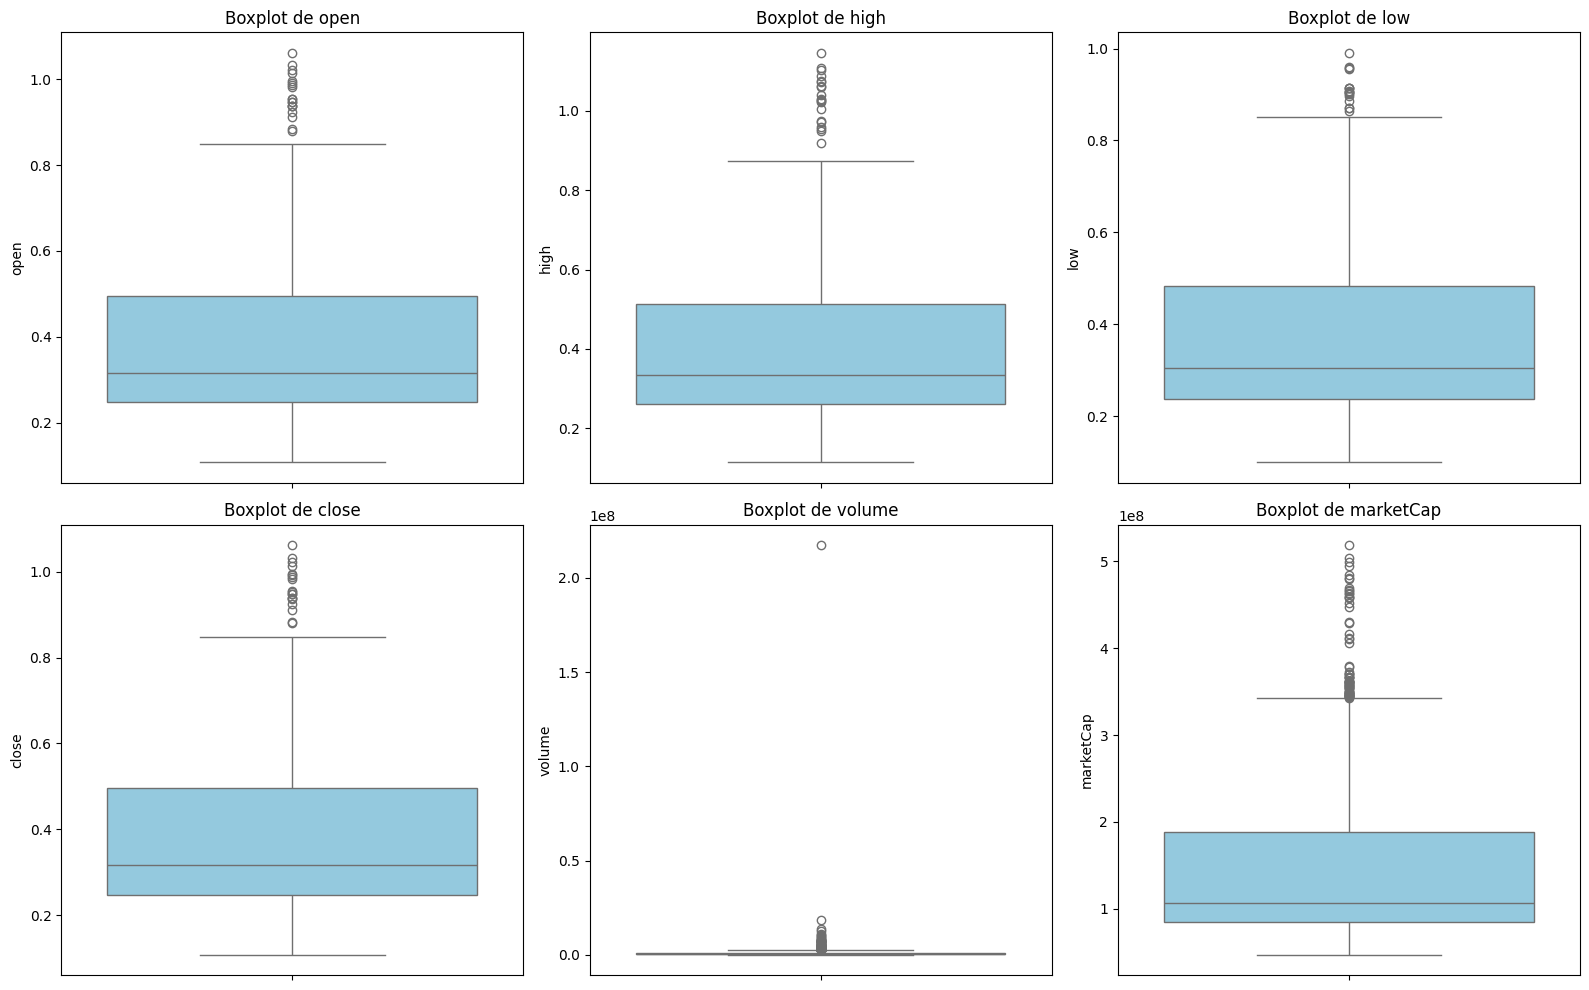

In [ ]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()
plt.show()

###### Boxplots Escala logaritmica

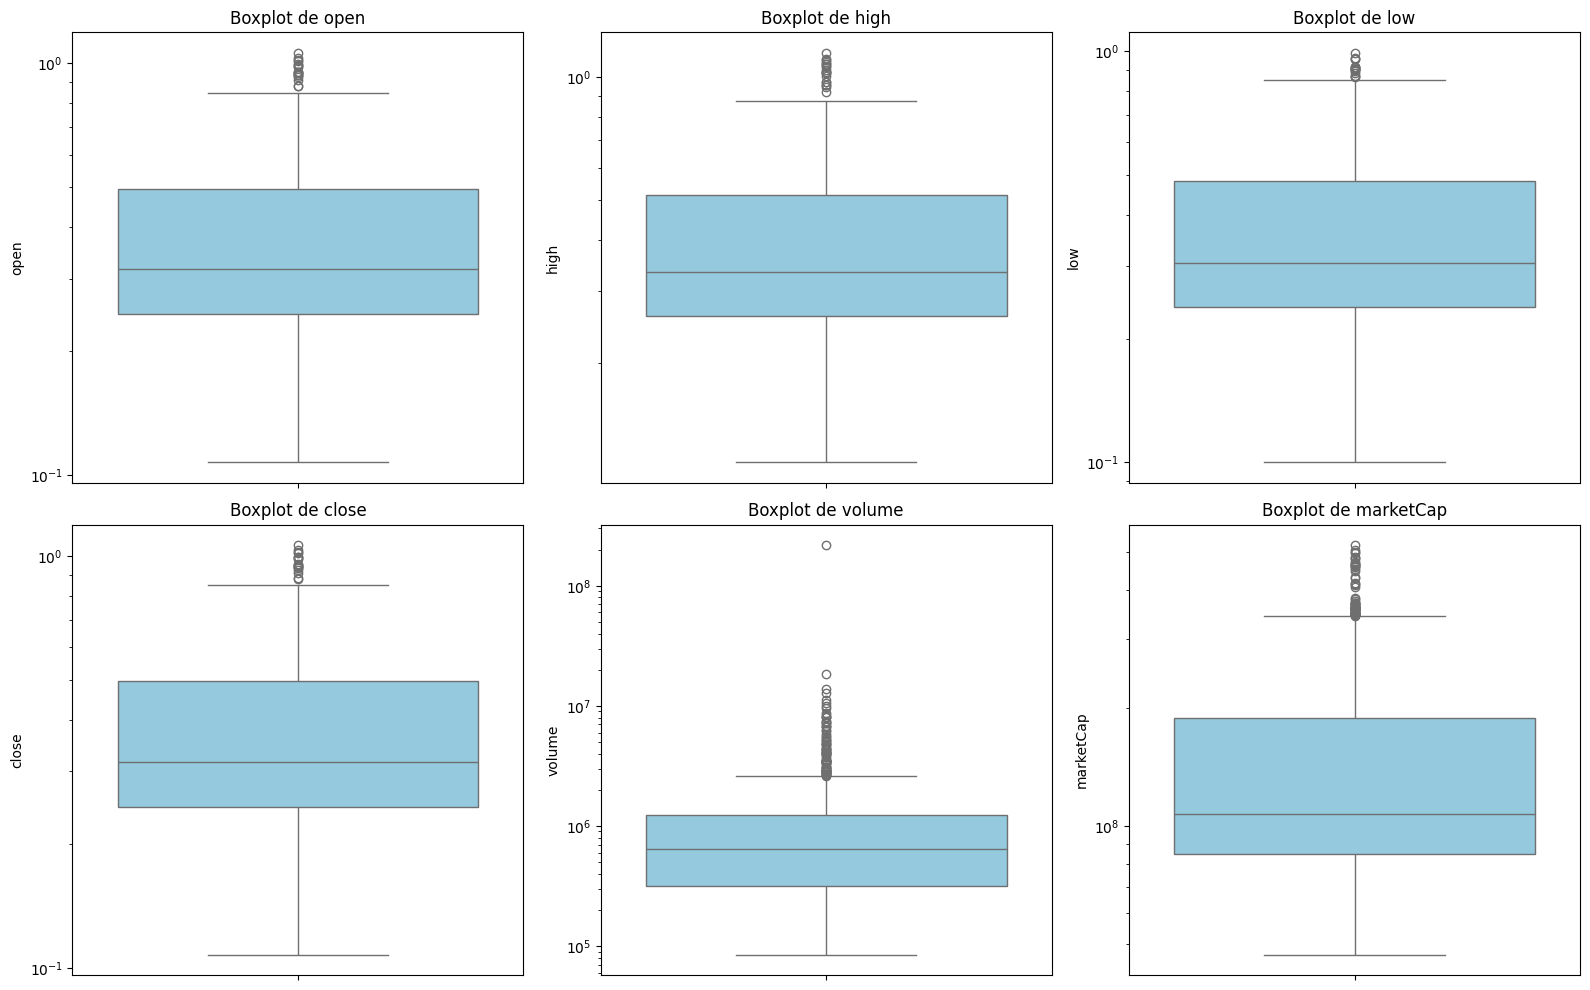

In [ ]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=data[col], color='skyblue')
    plt.yscale('log')
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()
plt.show()

| **Columna** | % Outliers | Recomendaci√≥n                | Justificaci√≥n breve                                                                 |
| ----------- | ---------- | ---------------------------- | ----------------------------------------------------------------------------------- |
| `open`      | 1.59%      | ‚úÖ **IQR Capping**            | Los valores extremos son pocos; puedes limitar sin afectar la distribuci√≥n general. |
| `high`      | 1.67%      | ‚úÖ **IQR Capping**            | Valores m√°ximos diarios pueden ser normales pero extremos; mejor acotarlos.         |
| `low`       | 1.42%      | ‚úÖ **IQR Capping**            | Similar a `high`, algunos m√≠nimos pueden ser ruido o volatilidad puntual.           |
| `close`     | 1.59%      | ‚úÖ **IQR Capping**            | Cierre tiende a seguir a apertura; ideal suavizar extremos sin eliminar datos.      |
| `volume`    | 6.85%      | üîÅ **Log1p + IQR Capping**   | Volumen suele ser muy sesgado; combina log para escala y capping para extremos.     |
| `marketCap` | 5.60%      | üîÅ **Log1p + Winsorizaci√≥n** | Muy sesgado, sensible a cambios extremos; usar log para escala y limitar extremos.  |




 üß† Explicaci√≥n adicional:

* **IQR Capping** = limita los valores a Q1 - 1.5√óIQR y Q3 + 1.5√óIQR.
* **Log1p** = transformaci√≥n `log(1 + x)` que reduce sesgo positivo.
* **Winsorizaci√≥n** = similar a capping pero m√°s suave, reemplaza por percentiles (P5, P95).



üìå Conclusi√≥n boxplots:

* Para columnas de **precios** (`open`, `high`, `low`, `close`): usa **IQR Capping** para mantener la estructura natural.
* Para columnas con **valores muy sesgados** (`volume`, `marketCap`): combina **logaritmo + winsorizaci√≥n** o **IQR capping** para obtener estabilidad y normalizaci√≥n sin perder datos.

##### Graficando la curva de densidad (KDE)

| **Ventaja**                               | **Explicaci√≥n**                                                                     |
| ----------------------------------------- | ----------------------------------------------------------------------------------- |
| üîÑ **Distribuci√≥n continua y suave**      | Muestra la forma general de los datos sin depender de cortes (bins) arbitrarios.    |
| üìä **Detecta m√∫ltiples modas f√°cilmente** | Permite identificar si la distribuci√≥n tiene m√°s de un pico (bimodal o multimodal). |
| üìà **Comparaci√≥n entre variables**        | √ötil para superponer varias curvas y comparar distribuciones sin confusi√≥n visual.  |
| üîé **Ideal para ver sesgo y simetr√≠a**    | Muestra si los datos est√°n sesgados a la izquierda o derecha, o si son sim√©tricos.  |



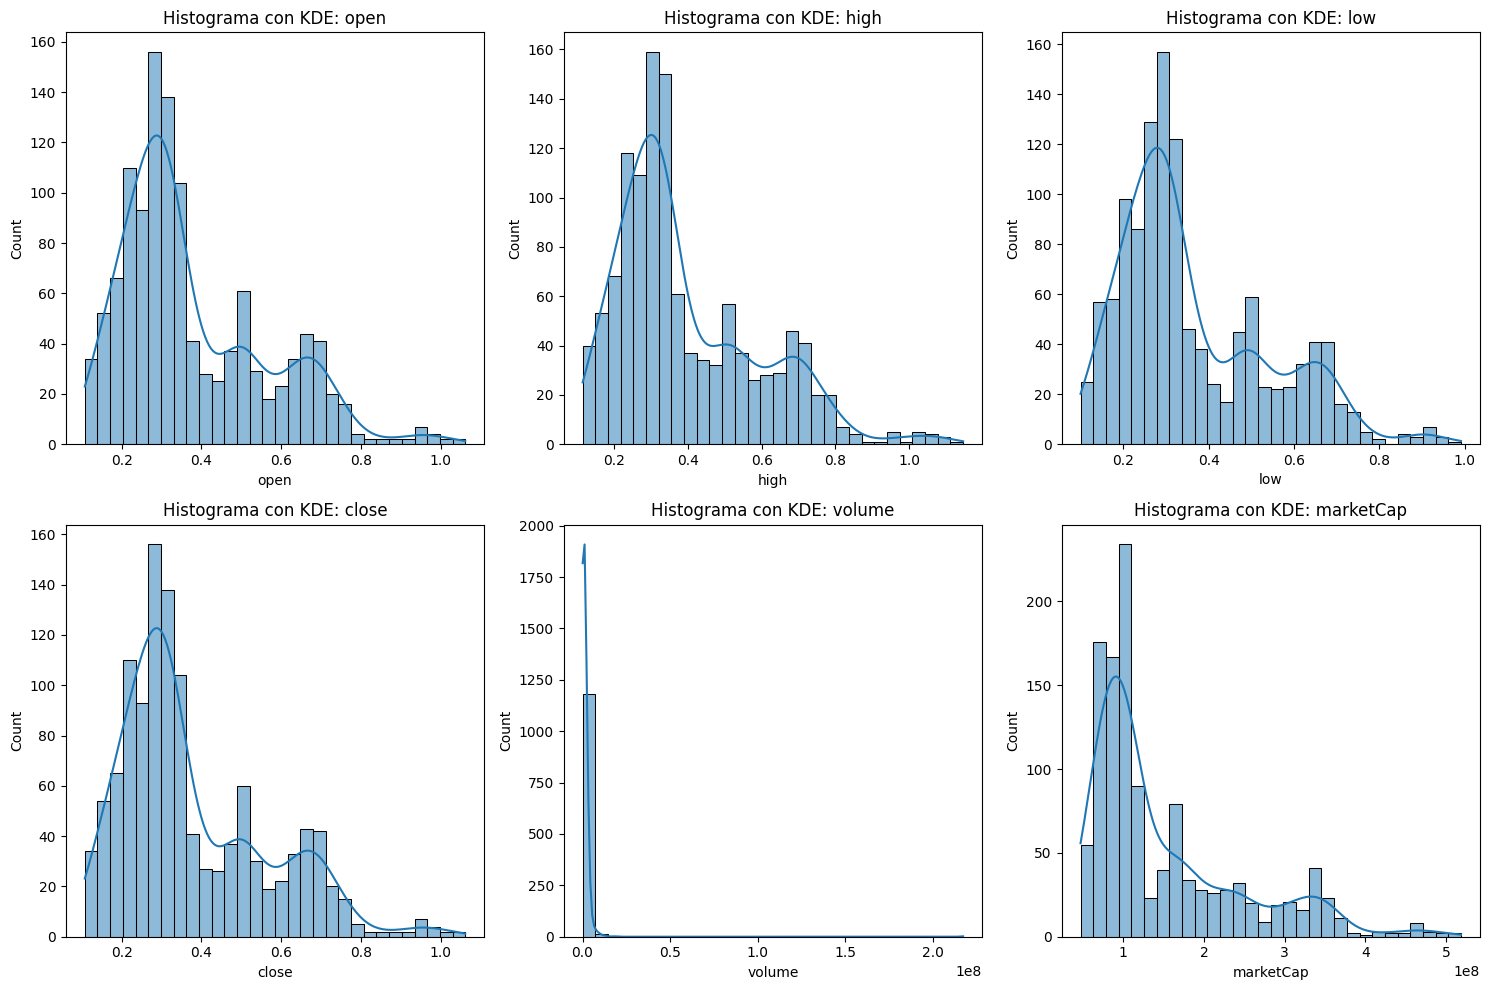

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], bins=30, kde=True, edgecolor='black')
    plt.title(f"Histograma con KDE: {col}")
plt.tight_layout()
plt.show()

| Variable    | Sesgada (S√≠/No) | Tipo de Asimetr√≠a (Skew) | Rango Observado | Distribuci√≥n      | Outliers Reales | ¬øAplicar log? | ¬øNormalizar? | Tratamiento Recomendado                                    |
| ----------- | --------------- | ------------------------ | --------------- | ----------------- | --------------- | ------------- | ------------ | ---------------------------------------------------------- |
| `open`      | S√≠              | Positiva (a la derecha)  | 0.2 ‚Äì 1.0       | Sesgada           | No              | ‚ùå             | ‚ùå (ya est√°)  | Mantener o aplicar `PowerTransformer` si se desea simetr√≠a |
| `high`      | S√≠              | Positiva (a la derecha)  | 0.2 ‚Äì 1.1       | Sesgada           | No              | ‚ùå             | ‚ùå (ya est√°)  | Igual que `open`                                           |
| `low`       | S√≠              | Positiva (a la derecha)  | 0.2 ‚Äì 1.0       | Sesgada           | No              | ‚ùå             | ‚ùå (ya est√°)  | Igual que `open`                                           |
| `close`     | S√≠              | Positiva (a la derecha)  | 0.2 ‚Äì 1.0       | Sesgada           | No              | ‚ùå             | ‚ùå (ya est√°)  | Igual que `open`                                           |
| `volume`    | S√≠ (fuerte)     | Positiva extrema         | 0 ‚Äì 2√ó10‚Å∏       | Altamente sesgada | S√≠              | ‚úî `log1p`     | ‚úî            | Aplicar `log1p` + normalizaci√≥n o winsorizing              |
| `marketCap` | S√≠ (fuerte)     | Positiva extrema         | 0 ‚Äì 5√ó10‚Å∏       | Altamente sesgada | S√≠              | ‚úî `log1p`     | ‚úî            | Igual que `volume`                                         |




 üéØ Interpretaci√≥n de la asimetr√≠a (skew)

* **Asimetr√≠a positiva (skew > 0)**: hay m√°s valores peque√±os y pocos valores grandes ‚Üí la cola est√° a la derecha.
* **Asimetr√≠a negativa (skew < 0)**: hay m√°s valores grandes y pocos peque√±os ‚Üí la cola est√° a la izquierda (no es el caso aqu√≠).
* **Asimetr√≠a cercana a 0**: distribuci√≥n sim√©trica (no aplica en tus datos actuales).




##### Graficando Pairplot

| Ventaja                               | Explicaci√≥n                                                                                                                               |
| ------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------- |
| üîÑ **Visualiza m√∫ltiples relaciones** | Muestra gr√°ficos de dispersi√≥n para cada par de variables, permitiendo detectar correlaciones o patrones entre varias columnas num√©ricas. |
| üìä **Distribuci√≥n en la diagonal**    | Muestra histogramas o curvas de densidad en la diagonal para entender la distribuci√≥n de cada variable individual.                        |
| üß† **Detecci√≥n de outliers o grupos** | Permite identificar valores at√≠picos o posibles agrupaciones (clusters) al observar relaciones bidimensionales.                           |
| üé® **F√°cil de personalizar**          | Puedes agregar colores seg√∫n una variable categ√≥rica (`hue`) para explorar diferencias entre grupos.                                      |
| üí° **Exploraci√≥n r√°pida**             | Resume en un solo gr√°fico lo que tomar√≠a muchos gr√°ficos individuales hacer, lo que ahorra tiempo y da una visi√≥n general m√°s clara.      |
                                   |


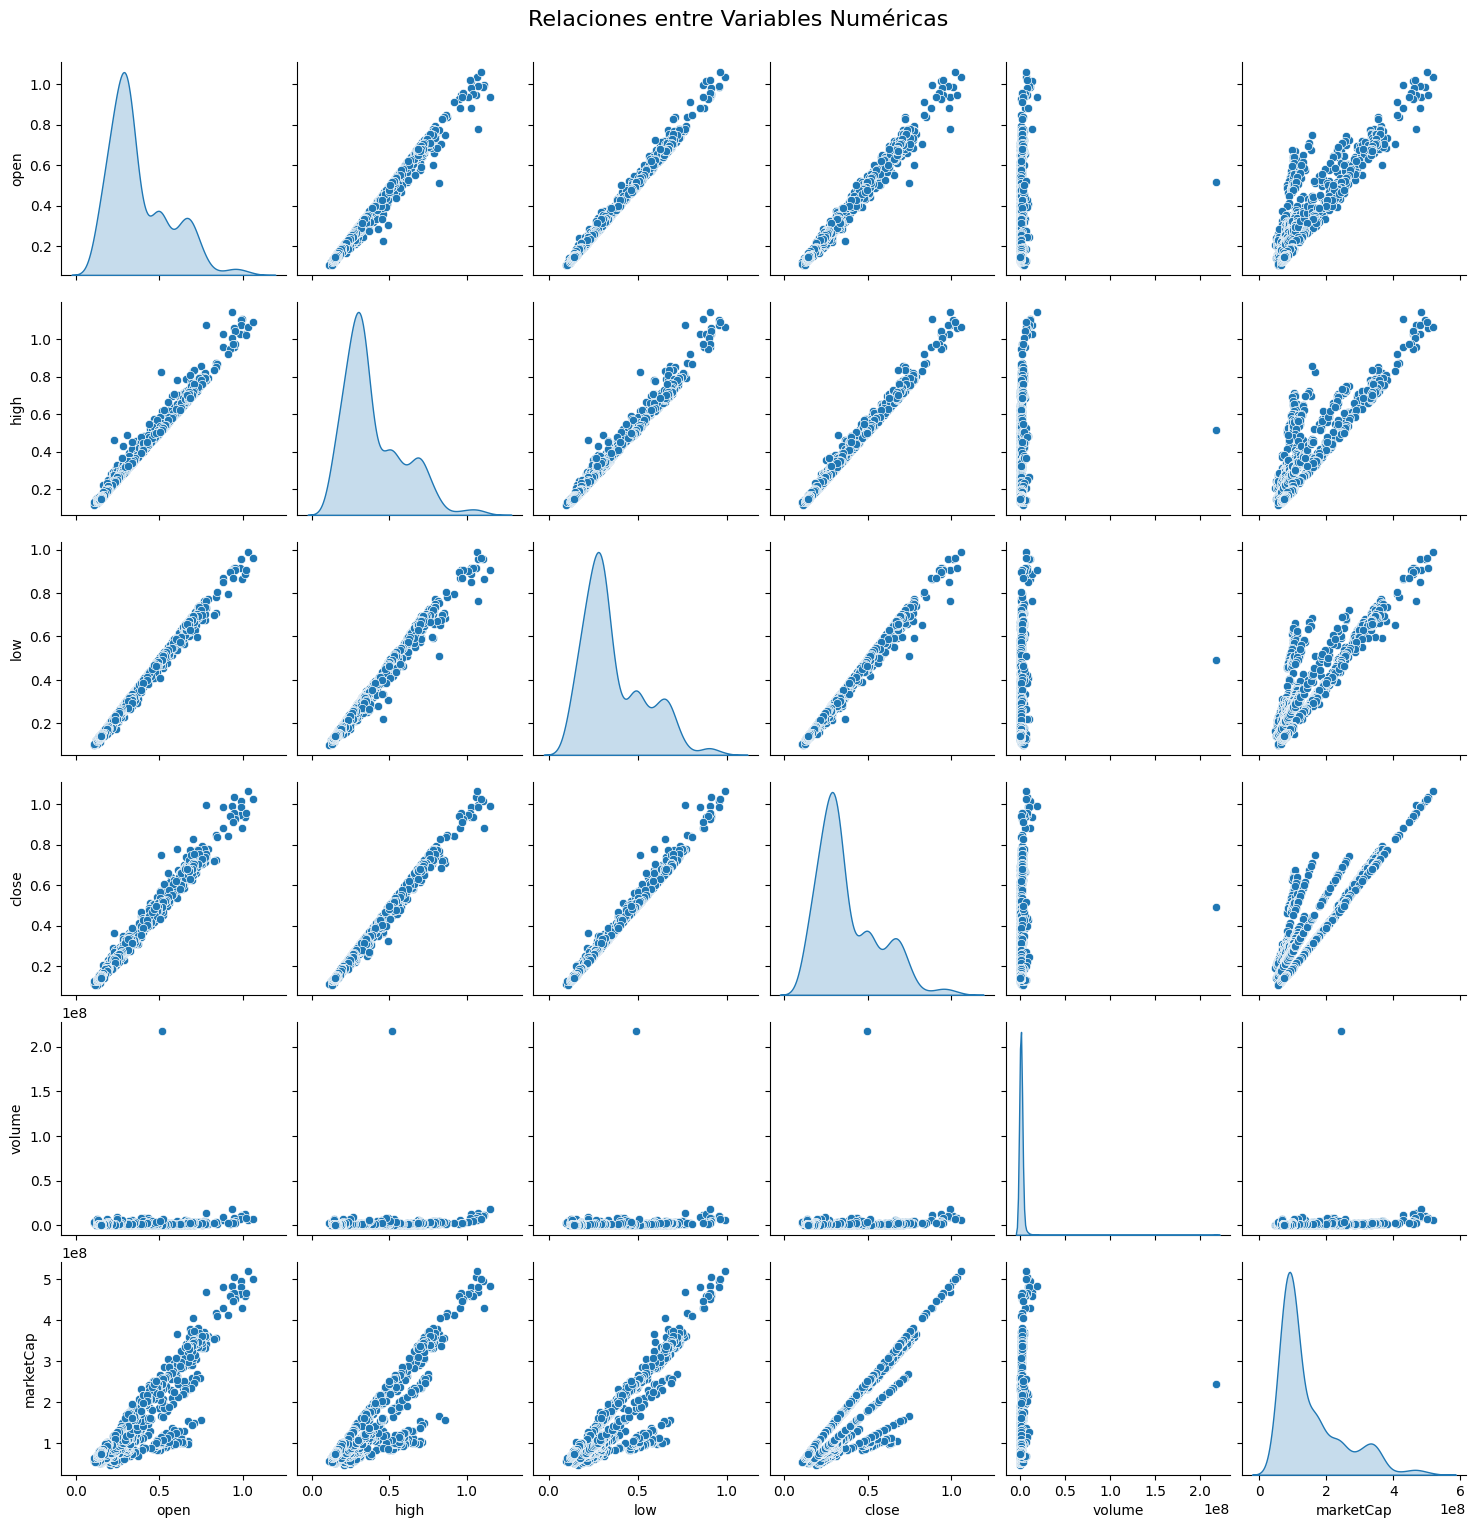

In [ ]:
sns.pairplot(data[numeric_cols], diag_kind='kde')
plt.suptitle("Relaciones entre Variables Num√©ricas", fontsize=16, y=1.02)
plt.show()



‚úÖ **Mejores combinaciones (para destacar en un cuadrado)**

1. **`open` vs `close`**

   * Alt√≠sima correlaci√≥n. Ideal para modelos de predicci√≥n del cierre con apertura.
   * √ötil para crear una variable de cambio diario (`close - open` o `% cambio`).

2. **`high` vs `low`**

   * Tambi√©n muy correlacionadas. Miden el rango de precios diario. √ötil para estimar volatilidad.

3. **`open` vs `marketCap`** o **`close` vs `marketCap`**

   * Alta correlaci√≥n (ya que `marketCap ‚âà precio * suministro`). Puede servir para inferir tendencias generales.

4. **`volume` vs `marketCap`**

   * Aunque m√°s dispersa, puede revelar momentos de sobrecompra/sobreventa.




## Limpieza de datos


### Conclusion en general:

| Variable    | Tipo           | % Outliers | Distribuci√≥n | Mejor Tratamiento                         | Justificaci√≥n clave                                                                |
| ----------- | -------------- | ---------- | ------------ | ----------------------------------------- | ---------------------------------------------------------------------------------- |
| `open`      | Precio         | 1.59%      | Sesgada      | **IQR Capping**                           | Tiene pocos outliers, y la distribuci√≥n no es severamente asim√©trica.              |
| `high`      | Precio         | 1.67%      | Sesgada      | **IQR Capping**                           | Comportamiento similar al de apertura, con pocos valores extremos.                 |
| `low`       | Precio         | 1.42%      | Sesgada      | **IQR Capping**                           | Outliers m√≠nimos pueden ser ruido, pero no representan un gran problema.           |
| `close`     | Precio         | 1.59%      | Sesgada      | **IQR Capping**                           | Repite el patr√≥n de apertura y cierre; acotar mejora estabilidad sin distorsionar. |
| `volume`    | Volumen        | 6.85%      | Muy sesgada  | **log1p + IQR Capping (o Winsorizaci√≥n)** | Tiene valores extremadamente altos; se recomienda escalar y limitar.               |
| `marketCap` | Capitalizaci√≥n | 5.60%      | Muy sesgada  | **log1p + Winsorizaci√≥n**                 | Sesgo fuerte con outliers altos que pueden afectar el modelado.                    |


#### IQR Capping para open, high, low, close

In [ ]:
for col in ['open', 'high', 'low', 'close']:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    data[col] = data[col].clip(lower=lower, upper=upper)

#### log1p + IQR Capping para volume

In [ ]:
data['volume_log'] = np.log1p(data['volume'])

In [ ]:
q1 = data['volume_log'].quantile(0.25)
q3 = data['volume_log'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

data['volume_log'] = data['volume_log'].clip(lower=lower, upper=upper)

#### log1p + Winsorizaci√≥n para marketCap

In [ ]:
from scipy.stats.mstats import winsorize

In [ ]:
data['marketCap_log'] = np.log1p(data['marketCap'])

In [ ]:
data['marketCap_log'] = winsorize(data['marketCap_log'], limits=[0.05, 0.05])

#### Eliminar solo las columnas originales transformadas

In [ ]:
data.drop(columns=['volume', 'marketCap'], inplace=True)

In [ ]:
data.head(-1)

open      high       low     close                        timestamp  \
1196  0.642921  0.713596  0.642069  0.653740 2022-01-23 23:59:59.999000+00:00   
1195  0.653545  0.683066  0.610550  0.663764 2022-01-24 23:59:59.999000+00:00   
1194  0.663450  0.698997  0.652596  0.666728 2022-01-25 23:59:59.999000+00:00   
1193  0.669312  0.697262  0.659934  0.673171 2022-01-26 23:59:59.999000+00:00   
1192  0.673175  0.692955  0.611925  0.626412 2022-01-27 23:59:59.999000+00:00   
...        ...       ...       ...       ...                              ...   
5     0.147126  0.151831  0.145287  0.146896 2025-04-28 23:59:59.999000+00:00   
4     0.146896  0.150635  0.142695  0.142789 2025-04-29 23:59:59.999000+00:00   
3     0.142789  0.150363  0.140585  0.148221 2025-04-30 23:59:59.999000+00:00   
2     0.148223  0.155236  0.144375  0.150644 2025-05-01 23:59:59.999000+00:00   
1     0.150653  0.154565  0.146853  0.148263 2025-05-02 23:59:59.999000+00:00   

      volume_log  marketCap_log  
1196   14.856669      18.455815  
1195   15.485416      18.471206  
1194   15.318055      18.475911  
1193   15.238551      18.485728  
1192   14.846390      18.413921  
...          ...            ...  
5      12.561919      18.147466  
4      13.027308      18.119252  
3      13.447291      18.157159  
2      13.589335      18.173556  
1      13.227169      18.157570  

[1196 rows x 7 columns]

## Resumen estadistico y de outliers

üß† **Interpretaci√≥n Final**

* El dataset ya **no presenta valores at√≠picos** que puedan distorsionar modelos estad√≠sticos o de Machine Learning.
* Las distribuciones de todas las variables son **m√°s equilibradas**, ideales para continuar con an√°lisis exploratorio profundo, correlaciones o modelado predictivo.
* El tratamiento fue **eficaz y no destructivo**, conservando la informaci√≥n esencial.

### Estadistico

In [ ]:
numericas_actual = data.select_dtypes(include='float64')

In [ ]:
numericas_actual.describe()

open         high          low        close   volume_log  \
count  1197.000000  1197.000000  1197.000000  1197.000000  1197.000000   
mean      0.376066     0.393657     0.362803     0.375679    13.400730   
std       0.179341     0.186682     0.172699     0.179347     0.915394   
min       0.107602     0.114406     0.100133     0.107602    11.348156   
25%       0.246659     0.259859     0.238533     0.246392    12.669767   
50%       0.316044     0.333913     0.304843     0.315962    13.366451   
75%       0.495507     0.513396     0.483832     0.495721    14.027762   
max       0.868780     0.893701     0.851780     0.869715    16.064755   

       marketCap_log  
count    1197.000000  
mean       18.665737  
std         0.523193  
min        17.962387  
25%        18.254478  
50%        18.489199  
75%        19.051957  
max        19.660900

| Variable                       | Observaci√≥n Clave                                                                                                                                                                                          |
| ------------------------------ | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `open`, `high`, `low`, `close` | Distribuci√≥n contenida en un rango estrecho (\~0.1 a \~0.87), con valores centrales consistentes. Las medias y medianas son muy similares, lo que sugiere una buena simetr√≠a tras el tratamiento.          |
| `volume_log`                   | La transformaci√≥n logar√≠tmica fue efectiva: los valores est√°n distribuidos entre \~11.3 y \~16.0, con desviaci√≥n est√°ndar moderada (\~0.91). La media y mediana est√°n cerca, indicando reducci√≥n de sesgo. |
| `marketCap_log`                | Tambi√©n mejor√≥ significativamente: rango de \~18.0 a \~19.6, con menor dispersi√≥n (\~0.52). Esto facilita su uso en modelos al reducir el efecto de los outliers y escalar la magnitud.                    |


### Outliers

In [ ]:
numericas_actual_out = data.select_dtypes(include='number')

In [ ]:
outliers_info = {}

for col in numericas_actual_out.columns:
    Q1 = numericas_actual_out[col].quantile(0.25)
    Q3 = numericas_actual_out[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = numericas_actual_out[(numericas_actual_out[col] < lower_bound) | (numericas_actual_out[col] > upper_bound)]
    cantidad = outliers.shape[0]
    porcentaje = (cantidad / len(numericas_actual_out)) * 100

    outliers_info[col] = {
        'Cantidad Outliers': cantidad,
        'Porcentaje Outliers (%)': round(porcentaje, 2)
    }

outliers_df = pd.DataFrame(outliers_info).T
print(outliers_df)

               Cantidad Outliers  Porcentaje Outliers (%)
open                         0.0                      0.0
high                         0.0                      0.0
low                          0.0                      0.0
close                        0.0                      0.0
volume_log                   0.0                      0.0
marketCap_log                0.0                      0.0


| Variable                       | Resultado Final                                                                                                                                         |
| ------------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `open`, `high`, `low`, `close` | **0% outliers** despu√©s del IQR Capping. Las distribuciones ahora est√°n controladas sin p√©rdida significativa de datos.                                 |
| `volume_log`, `marketCap_log`  | **0% outliers** gracias a la combinaci√≥n de **log-transformaci√≥n + winsorizaci√≥n/capping**, lo que estabiliz√≥ la escala y elimin√≥ los valores extremos. |


## Analisis Visual

In [ ]:
numeric_cols = ['open', 'high', 'low', 'close', 'volume_log', 'marketCap_log']

##### Boxplots (Distribuci√≥n y Outliers)

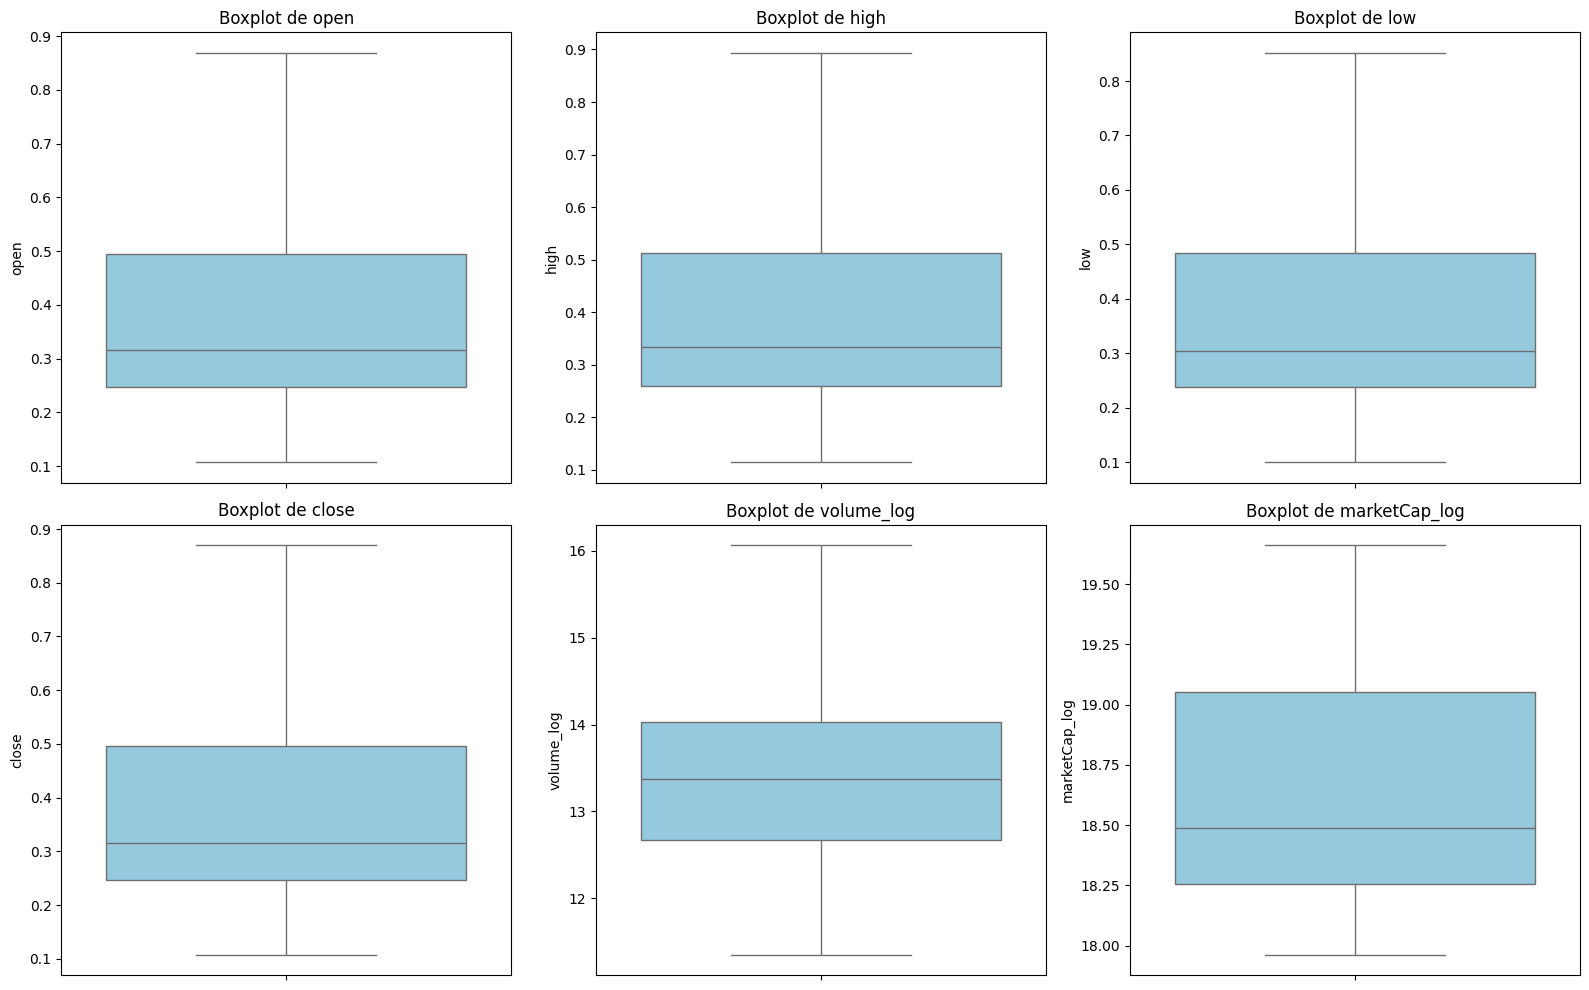

In [ ]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()

plt.show()

‚úÖ **Variables sin outliers evidentes (datos limpios)**:

* `open`, `high`, `low`, `close`:

  * Las cuatro variables de precios muestran distribuciones bastante sim√©tricas y sin valores at√≠picos (outliers) extremos.
  * Esto indica datos **limpios y consistentes** para entrenamiento de modelos o an√°lisis de series temporales.
  * Los valores est√°n dentro del rango esperado para precios de una criptomoneda que opera entre 0.1 y 0.9.

‚úÖ **Variables transformadas (log) tambi√©n limpias**:

* `volume_log` y `marketCap_log`:

  * La transformaci√≥n logar√≠tmica ha sido efectiva:

    * Comprime la escala y reduce el impacto de posibles outliers.
    * Hace que la distribuci√≥n sea m√°s sim√©trica y adecuada para modelos lineales o redes neuronales.
  * No se observan valores extremos fuera de los bigotes.

üìå **Conclusi√≥n general**:

* **Los datos est√°n bien preprocesados y limpios**.
* Puede proceder a:

  * **Crear features** como cambios diarios (`close - open`), rangos (`high - low`), o diferencias de logs.
  * **Entrenar modelos sin preocuparte por outliers** extremos que afecten el desempe√±o.



##### Curvas de densidad (KDE)

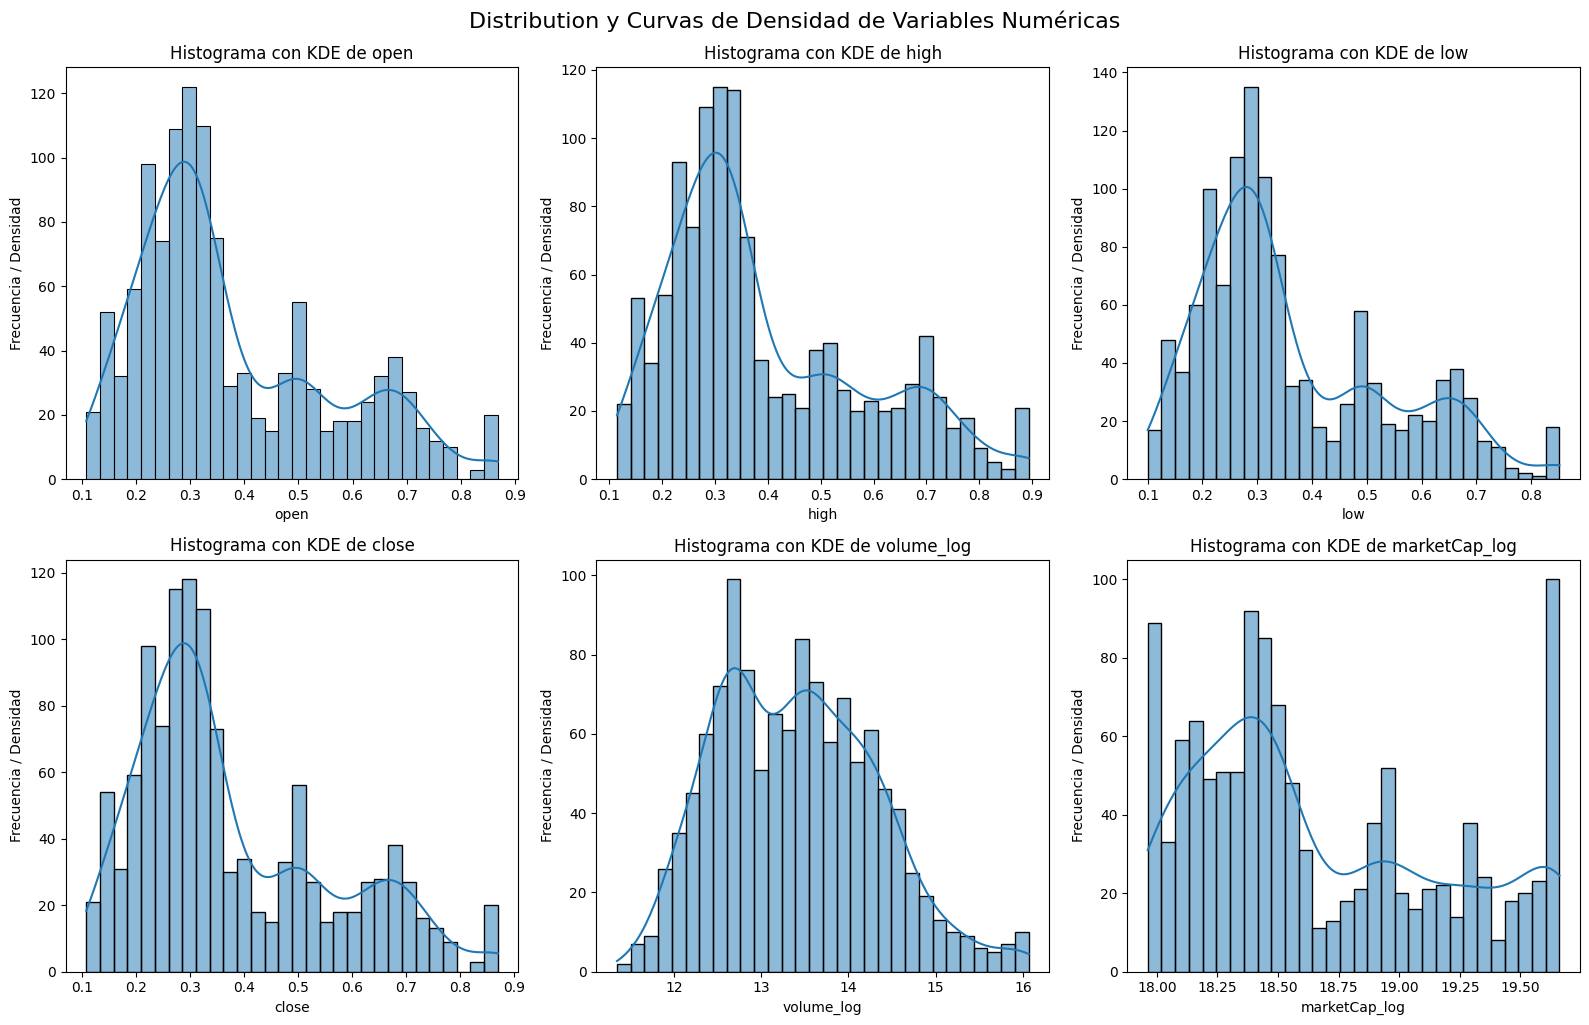

In [ ]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=data, x=col, bins=30, kde=True, edgecolor='black')
    plt.title(f'Histograma con KDE de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia / Densidad')
    plt.tight_layout()

plt.suptitle("Distribution y Curvas de Densidad de Variables Num√©ricas", y=1.02, fontsize=16)
plt.show()

 Conclusi√≥n General:
- ‚úÖ No hay outliers seg√∫n los m√©todos estad√≠sticos aplicados.

- üßπ No se requiere limpieza adicional ni transformaci√≥n de variables.

- üìâ Las variables de precios (open, high, low, close) tienen distribuci√≥n asim√©trica pero dentro de rangos normales.

- üîç La bimodalidad observada en marketCap_log y volume_log sugiere diferentes comportamientos del mercado. Podr√≠as aplicar clustering (como K-means o DBSCAN) para analizar estos grupos.

- üß† Estos datos est√°n listos para modelado, como regresiones, predicci√≥n de precios o an√°lisis de tendencias.

##### Grafica de dispersion entre variables numericas

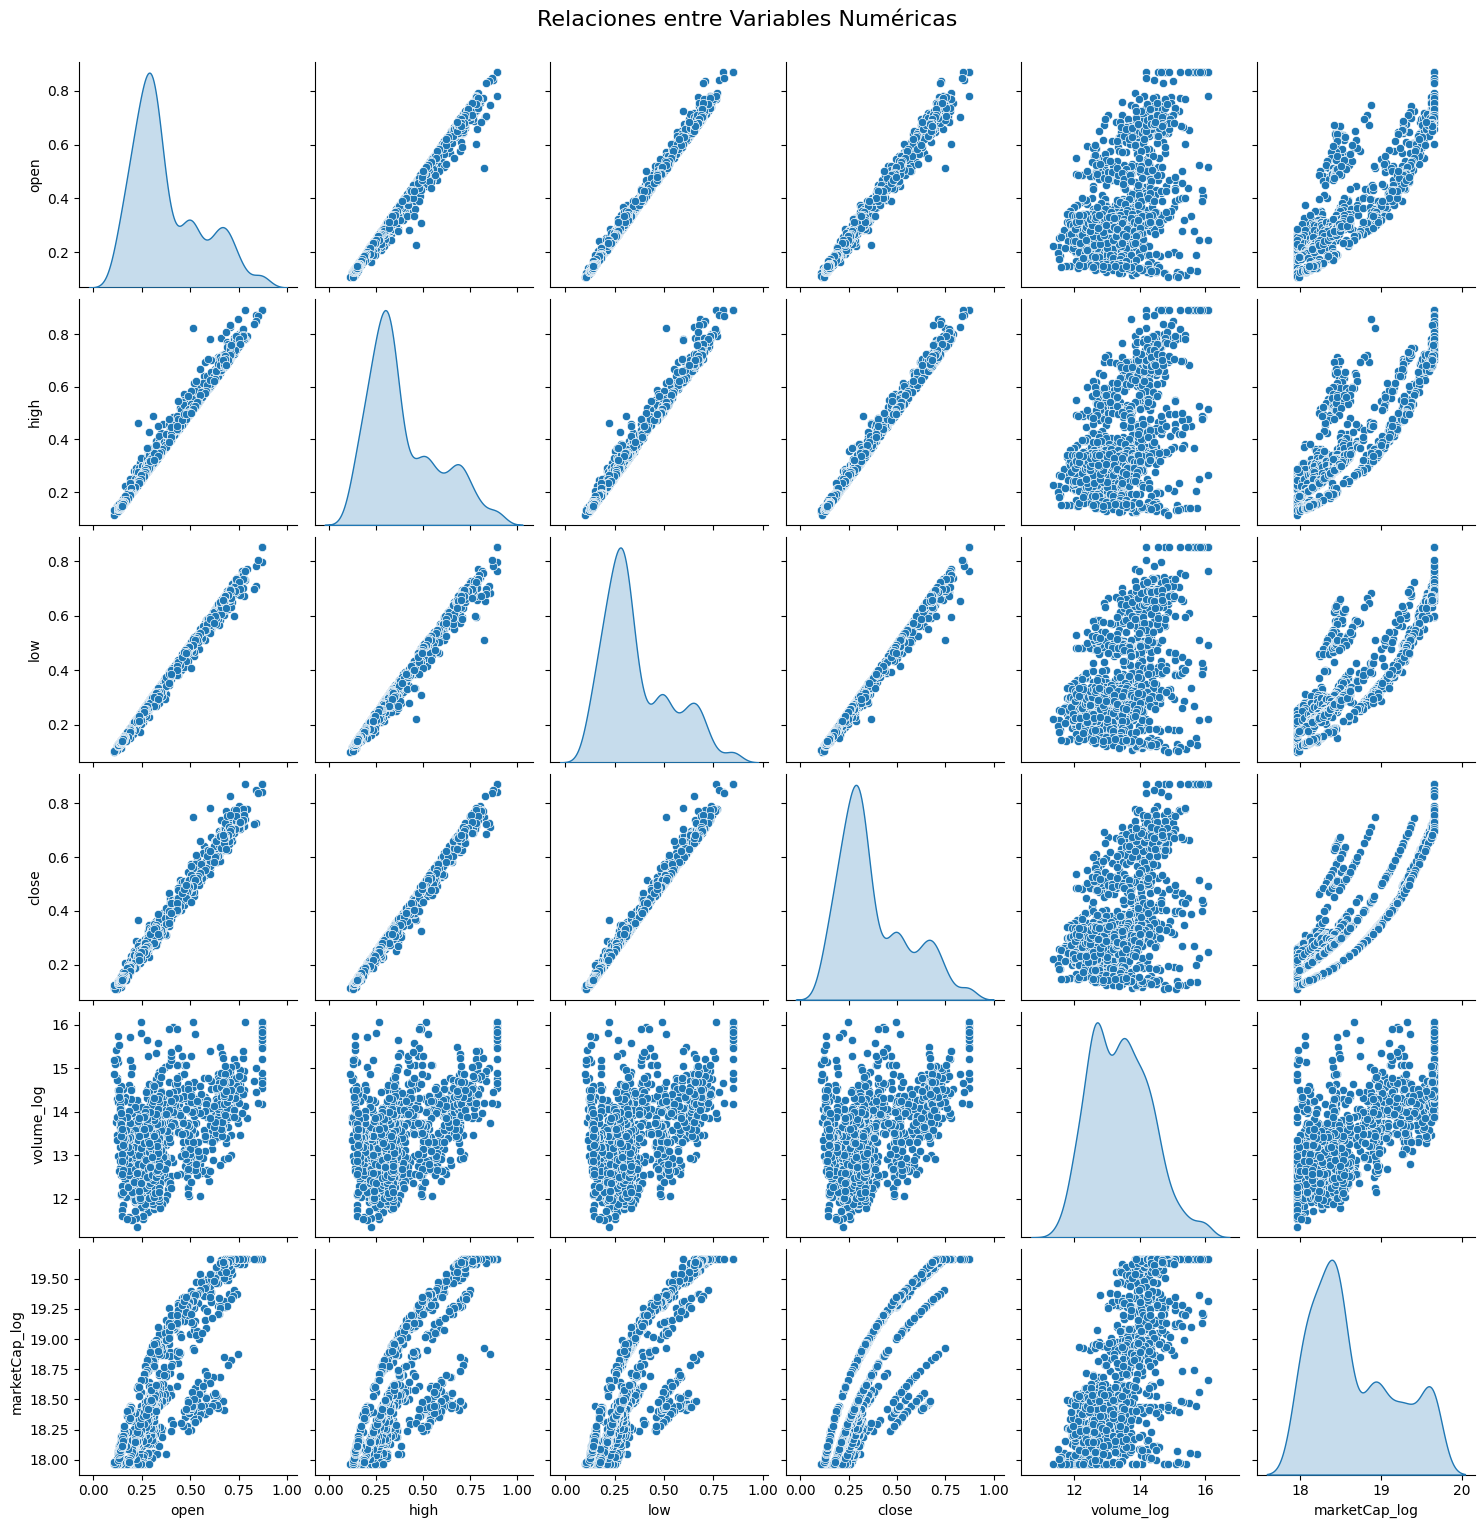

In [ ]:
sns.pairplot(data[numeric_cols], diag_kind='kde')
plt.suptitle("Relaciones entre Variables Num√©ricas", fontsize=16, y=1.02)
plt.show()

 üìä **Conclusiones del An√°lisis de Relaciones entre Variables Num√©ricas:**

1. **Fuerte correlaci√≥n entre precios (`open`, `high`, `low`, `close`)**:

   * Se observa una **alta correlaci√≥n lineal positiva** entre los precios de apertura, cierre, m√°ximo y m√≠nimo. Esto es esperable, ya que los precios diarios suelen moverse en conjunto. Las gr√°ficas muestran alineaciones muy estrechas, lo que indica consistencia en los movimientos de precios.

2. **Relaciones no lineales con `volume_log` y `marketCap_log`**:

   * Las variables transformadas con logaritmos (`volume_log`, `marketCap_log`) no presentan relaciones lineales fuertes con los precios, aunque hay **ciertas curvas suaves** que indican que podr√≠a existir alguna relaci√≥n no lineal o con cierta estacionalidad.

3. **Distribuciones suaves y normales sin presencia de outliers**:

   * Las distribuciones en la diagonal muestran que tras la normalizaci√≥n y limpieza, los datos siguen una distribuci√≥n **relativamente normal y continua**, sin valores extremos ni anomal√≠as.
   * Confirmado tambi√©n por la tabla: **0% de outliers** en todas las variables.

4. **`marketCap_log` tiene una distribuci√≥n m√°s concentrada que `volume_log`**:

   * La distribuci√≥n de `marketCap_log` es m√°s sesgada y concentrada, lo que indica menor variabilidad relativa comparada con el volumen.




##### Matriz de correlaci√≥n

In [ ]:
correlation_matrix = data[numeric_cols].corr(method='pearson')

In [ ]:
print(correlation_matrix)

                   open      high       low     close  volume_log  \
open           1.000000  0.992024  0.996681  0.991859    0.499222   
high           0.992024  1.000000  0.991482  0.995404    0.522425   
low            0.996681  0.991482  1.000000  0.995254    0.493633   
close          0.991859  0.995404  0.995254  1.000000    0.508611   
volume_log     0.499222  0.522425  0.493633  0.508611    1.000000   
marketCap_log  0.843327  0.841011  0.846974  0.848850    0.638660   

               marketCap_log  
open                0.843327  
high                0.841011  
low                 0.846974  
close               0.848850  
volume_log          0.638660  
marketCap_log       1.000000  


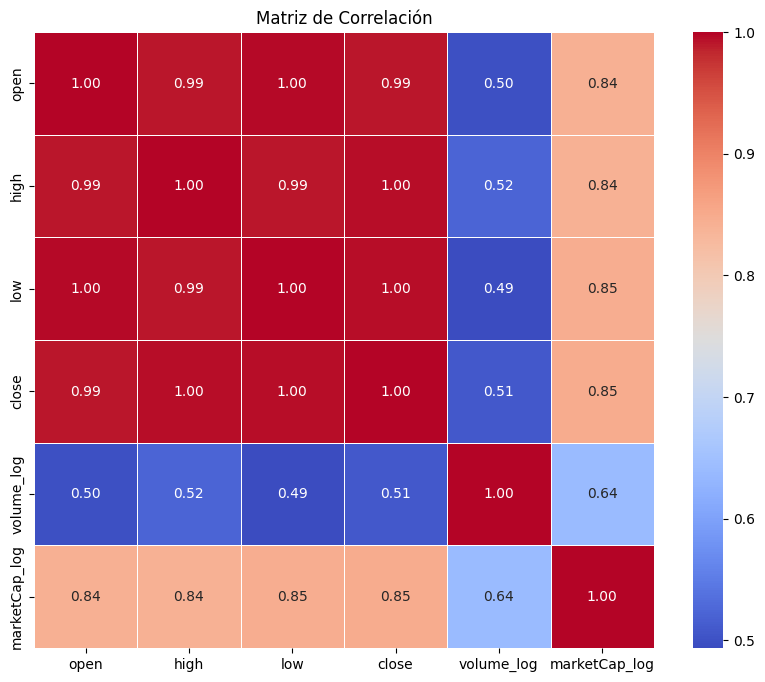

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlaci√≥n')
plt.show()

| Caracter√≠stica                              | Pearson                                                                                                               | Spearman                       | Kendall                         |
| ------------------------------------------- | --------------------------------------------------------------------------------------------------------------------- | ------------------------------ | ------------------------------- |
| **Qu√© mide**                                | Relaci√≥n **lineal** entre variables                                                                                   | Relaci√≥n **mon√≥tona** (rangos) | Relaci√≥n mon√≥tona (pares orden) |
| **Asume datos normales / homocedasticidad** | ‚úîÔ∏è Ideal si las variables se aproximan a normalidad                                                                   | ‚ùå No la requiere               | ‚ùå No la requiere                |
| **Sensibilidad a outliers**                 | üî∂ Alta (los valores extremos distorsionan)                                                                           | ‚ö™Ô∏è Moderada                    | ‚ö™Ô∏è Moderada                     |
| **Robustez ante empates o datos discretos** | ‚ùå Pobre                                                                                                               | ‚úîÔ∏è Buena                       | ‚úîÔ∏è Excelente                    |
| **Captura dependencia no lineal**           | ‚ùå Solo lineal                                                                                                         | ‚ö™Ô∏è Detecta monotonicidad       | ‚ö™Ô∏è Detecta monotonicidad        |
| **Recomendado para tu caso**                | ‚úîÔ∏è Variables **log-transformadas**, normalizadas y con outliers ya tratados, donde buscas relaciones lineales claras. | ‚ùå Menos necesario aqu√≠         | ‚ùå Menos necesario aqu√≠          |



**Por qu√© Pearson en el proyecto**

* Tras aplicar **log1p**, IQR capping y winsorizaci√≥n, las variables (`open`, `high`, `low`, `close`, `volume_log`, `marketCap_log`) se acercan a una distribuci√≥n m√°s normal y sin outliers, cumpliendo los supuestos de Pearson.
* Buscas medir la **fuerza y direcci√≥n** de la relaci√≥n lineal entre precio, volumen y capitalizaci√≥n en un contexto financiero, donde la linealidad es un indicador √∫til.
* Modelos futuros (regresiones, PCA, redes neuronales) se benefician de conocer estas relaciones lineales de manera directa.


 üìà **Conclusiones de la Matriz de Correlaci√≥n:**

1. **Correlaci√≥n casi perfecta entre los precios (`open`, `high`, `low`, `close`)**:

   * Todas estas variables tienen coeficientes de correlaci√≥n cercanos a **1.00**, lo que indica una relaci√≥n **lineal extremadamente fuerte**. Este resultado es coherente con la naturaleza del mercado financiero, donde los precios diarios se mueven en conjunto.
   * Ejemplo: `close` con `low` = 1.00, `open` con `high` = 0.99.

2. **`marketCap_log` tiene alta correlaci√≥n con precios**:

   * La capitalizaci√≥n de mercado transformada con logaritmos tiene una **alta correlaci√≥n con los precios** (`‚âà0.84 - 0.85`). Esto es l√≥gico, ya que el market cap depende directamente del precio.
   * Esto sugiere que **cualquier modelo de predicci√≥n del marketCap podr√≠a beneficiarse al incluir los precios como variables explicativas**.

3. **`volume_log` muestra correlaciones medias con los precios (\~0.49 - 0.52)**:

   * Aunque m√°s d√©biles, estas correlaciones indican que el volumen tiene cierta relaci√≥n con los precios, pero **no es tan fuerte como el marketCap**.
   * La correlaci√≥n con `marketCap_log` tambi√©n es moderada (**0.64**), lo cual puede indicar que en esta criptomoneda el volumen no siempre acompa√±a al valor total del mercado.

4.  Conclusi√≥n sobre `volume_log`:
* La variable volume_log est√° bien transformada y lista para an√°lisis. Su distribuci√≥n es adecuada y sin outliers, lo que mejora la estabilidad y eficacia de modelos predictivos. Aunque no tiene una correlaci√≥n fuerte con los precios, su comportamiento moderadamente correlacionado con el marketCap_log la convierte en una variable √∫til para analizar la actividad del mercado y la liquidez de la criptomoneda.


### Resumen del Proceso:



1. **Limpieza de outliers**

   * Precios (`open`, `high`, `low`, `close`): se aplic√≥ IQR Capping y quedaron sin valores at√≠picos.
   * Volumen y capitalizaci√≥n (`volume_log`, `marketCap_log`): se us√≥ `log1p` + winsorizaci√≥n/capping, eliminando todos los outliers.

2. **Transformaciones**

   * `volume` y `marketCap` pasaron a escala logar√≠tmica, reduciendo asimetr√≠a y homogeneizando la escala de las variables.

3. **An√°lisis visual**

   * **Boxplots**, **histogramas con KDE**, **scatterplots** y **heatmap de correlaci√≥n** confirman datos limpios, distribuciones razonables y relaciones fuertes entre los precios (‚âà0.99) y moderadas entre precio/volumen (‚âà0.5) y precio/marketCap (‚âà0.85).


# Data Final

| **Columna**     | **Significado**                                                                                                                                      |
| --------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------- |
| `open`          | Precio de apertura del d√≠a: primer precio al que se negoci√≥ CFG en la jornada.                                                                       |
| `high`          | Precio m√°ximo del d√≠a: valor m√°s alto alcanzado durante la sesi√≥n de trading.                                                                        |
| `low`           | Precio m√≠nimo del d√≠a: valor m√°s bajo alcanzado durante la sesi√≥n de trading.                                                                        |
| `close`         | Precio de cierre del d√≠a: √∫ltimo precio registrado al finalizar la jornada (marca el valor de referencia para el siguiente d√≠a).                     |
| `timestamp`     | Fecha y hora en que se registr√≥ el precio de cierre (en formato UTC).                                                                                |
| `volume_log`    | Volumen de transacciones diario transformado con `log1p` (log(1‚ÄØ+‚ÄØvolumen)) para reducir sesgos y escala del dato original.                          |
| `marketCap_log` | Capitalizaci√≥n de mercado diaria transformada con `log1p` (log(1‚ÄØ+‚ÄØmarketCap)) para homogeneizar la escala y atenuar el impacto de valores extremos. |


In [ ]:
data.head(-1)

open      high       low     close                        timestamp  \
1196  0.642921  0.713596  0.642069  0.653740 2022-01-23 23:59:59.999000+00:00   
1195  0.653545  0.683066  0.610550  0.663764 2022-01-24 23:59:59.999000+00:00   
1194  0.663450  0.698997  0.652596  0.666728 2022-01-25 23:59:59.999000+00:00   
1193  0.669312  0.697262  0.659934  0.673171 2022-01-26 23:59:59.999000+00:00   
1192  0.673175  0.692955  0.611925  0.626412 2022-01-27 23:59:59.999000+00:00   
...        ...       ...       ...       ...                              ...   
5     0.147126  0.151831  0.145287  0.146896 2025-04-28 23:59:59.999000+00:00   
4     0.146896  0.150635  0.142695  0.142789 2025-04-29 23:59:59.999000+00:00   
3     0.142789  0.150363  0.140585  0.148221 2025-04-30 23:59:59.999000+00:00   
2     0.148223  0.155236  0.144375  0.150644 2025-05-01 23:59:59.999000+00:00   
1     0.150653  0.154565  0.146853  0.148263 2025-05-02 23:59:59.999000+00:00   

      volume_log  marketCap_log  
1196   14.856669      18.455815  
1195   15.485416      18.471206  
1194   15.318055      18.475911  
1193   15.238551      18.485728  
1192   14.846390      18.413921  
...          ...            ...  
5      12.561919      18.147466  
4      13.027308      18.119252  
3      13.447291      18.157159  
2      13.589335      18.173556  
1      13.227169      18.157570  

[1196 rows x 7 columns]

In [ ]:
new_data = pd.DataFrame(data)

In [ ]:
data.to_csv('new_data.csv', index=False)

In [ ]:
from google.colab import files
files.download('new_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Posibles Features

| **Nueva Columna**      | **Derivaci√≥n**                  | **Por qu√© es √∫til**                                                                             |
| ---------------------- | ------------------------------- | ----------------------------------------------------------------------------------------------- |
| `daily_return`         | `(close - open) / open`         | Captura el **rendimiento diario** de la moneda, clave para predecir tendencias de precio.       |
| `log_return`           | `np.log(close) - np.log(open)`  | Retorno logar√≠tmico con mejor **aproximaci√≥n normal**, √∫til en muchos modelos financieros.      |
| `price_range_pct`      | `(high - low) / open`           | Mide la **volatilidad intrad√≠a** en un solo valor normalizado.                                  |
| `std_return_7d`        | `daily_return.rolling(7).std()` | Desviaci√≥n est√°ndar m√≥vil de retornos (7 d√≠as), refleja la **volatilidad reciente**.            |
| `ma_close_7d`          | `close.rolling(7).mean()`       | Media m√≥vil a 7 d√≠as del precio de cierre, suaviza ruido y muestra **tendencia a corto plazo**. |
| `ma_close_30d`         | `close.rolling(30).mean()`      | Media m√≥vil a 30 d√≠as, detecta **tendencia a mediano/largo plazo**.                             |
| `momentum_7d`          | `close - close.shift(7)`        | Medida de **momentum**, cu√°nto ha cambiado el precio en la √∫ltima semana.                       |
| `volume_log_change`    | `volume_log.diff()`             | Varia¬≠ci√≥n diaria del volumen (log), ayuda a detectar **picos o ca√≠das repentinas** de trading. |
| `volume_log_ma_7d`     | `volume_log.rolling(7).mean()`  | Suaviza el volumen para identificar **tendencias de inter√©s** en el mercado.                    |
| `marketcap_log_change` | `marketCap_log.diff()`          | Cambio diario en capitalizaci√≥n (log), indicador de **flujo de inversi√≥n**.                     |
| `liq_ratio`            | `volume_log / marketCap_log`    | Relaci√≥n entre volumen y capitalizaci√≥n, mide la **liquidez relativa** de la criptomoneda.      |


**¬øPor qu√© crear estas features?**

* **Rendimiento y momentum** (`daily_return`, `log_return`, `momentum_7d`): ayudan a tu modelo a aprender la direcci√≥n y velocidad de los movimientos de precio.
* **Volatilidad** (`price_range_pct`, `std_return_7d`): es un factor clave en finanzas para cuantificar riesgo.
* **Tendencia** (`ma_close_7d`, `ma_close_30d`): media m√≥vil te permite diferenciar ruido de patrones reales de subida o bajada.
* **Actividad de mercado** (`volume_log_change`, `volume_log_ma_7d`, `marketcap_log_change`, `liq_ratio`): todas estas capturan cambios y niveles de participaci√≥n que a menudo anticipan giros de precio.

Con estas nuevas columnas tendre un **set de features mucho m√°s rico** que cubre precio, volatilidad, momentum y volumen, lo que suele mejorar significativamente el desempe√±o de modelos de regresi√≥n, clasificaci√≥n de tendencias, o incluso modelos de series temporales avanzados.
